# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [3]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [6]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Change current working directory to project folder (1 mark)

In [8]:
import os
#os.chdir('/content/drive/My Drive/Projects/Siamese Face Recognition')
os.chdir('/home/balachandra/Desktop/Data Science/GreatLearning/Projects/Project 10 - Face Recognition')

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile
path = '/content/drive/My Drive/Projects/Siamese Face Recognition'
face_data = ZipFile('Aligned Face Dataset from Pinterest.zip')
face_data.extractall(path)
face_data.close()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [9]:
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [10]:
metadata

array([PINS/pins_Morgan Freeman/Morgan Freeman0_577.jpg,
       PINS/pins_Morgan Freeman/Morgan Freeman21_653.jpg,
       PINS/pins_Morgan Freeman/Morgan Freeman193_596.jpg, ...,
       PINS/pins_Danielle Panabaker/Danielle Panabaker18.jpg,
       PINS/pins_Danielle Panabaker/Danielle Panabaker25.jpg,
       PINS/pins_Danielle Panabaker/Danielle Panabaker74.jpg],
      dtype=object)

### Define function to load image
- Define a function to load image from the metadata

In [11]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [12]:
path = metadata[10].image_path()
load_image(path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [14]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [15]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [16]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [17]:
embedding_vector

array([ 0.00250573, -0.00314754, -0.01118262, ..., -0.01178547,
        0.00814449, -0.00661243], dtype=float32)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings = []
for x in range(len(metadata)):
    img_path = metadata[x].image_path()
    img = load_image(img_path)
    img = (img/255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    img = np.expand_dims(img, axis = 0)
    prediction = vgg_face_descriptor.predict(img)[0]
    embeddings.append(prediction)

In [0]:
np.array(embeddings).dump(open('prediction_embeddings.npy', 'wb'))

In [18]:
import numpy as np
embeddings = np.load('prediction_embeddings.npy', allow_pickle=True)

In [19]:
embeddings.shape

(10770, 2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

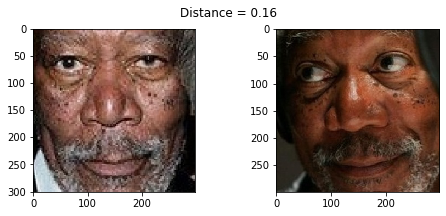

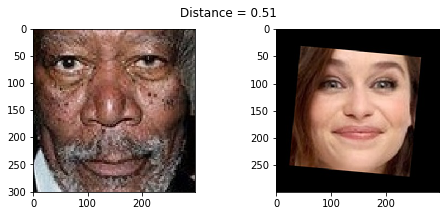

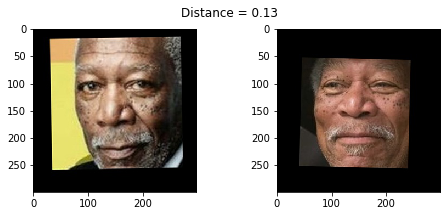

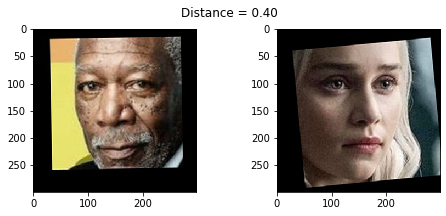

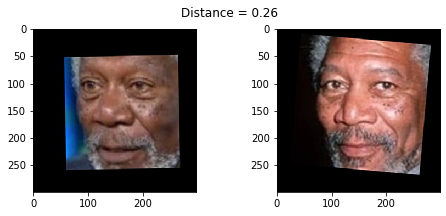

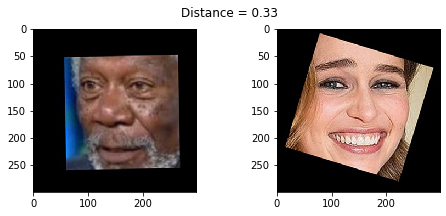

In [91]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [92]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train_original = np.array(embeddings)[train_idx]
X_test_original = np.array(embeddings)[test_idx]

print("Train Set:", X_train_original.shape)
print("Test Set:", X_test_original.shape)

Train Set: (9573, 2622)
Test Set: (1197, 2622)


In [93]:
names = []
for i in metadata:
  names.append(i.name)

y_train_original = np.array(names)[train_idx]
y_test_original = np.array(names)[test_idx]
print("Y train:", y_train_original.shape)
print("Y test:", y_test_original.shape)

Y train: (9573,)
Y test: (1197,)


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train_original)
y_test = le.transform(y_test_original)

In [95]:
y_train

array([40, 40, 40, ..., 16, 16, 16])

In [96]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [97]:
y_test

array([40, 40, 40, ..., 16, 16, 16])

In [98]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [99]:
print(le.inverse_transform(y_train)[9572])
print(le.inverse_transform(y_test)[1196])
print(le.inverse_transform(y_train)[0])
print(le.inverse_transform(y_test)[0])

pins_Danielle Panabaker
pins_Danielle Panabaker
pins_Morgan Freeman
pins_Morgan Freeman


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [100]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_original)
X_test = sc.transform(X_test_original)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [101]:
from sklearn.decomposition import PCA
#Loading all the features to PCA
pca = PCA(n_components=2622)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
print(pca.explained_variance_ratio_)

[1.3588881e-01 5.3979903e-02 3.9903808e-02 ... 1.6775860e-09 1.6560013e-09
 9.1947540e-11]


Text(0.5, 0, 'eigen Value')

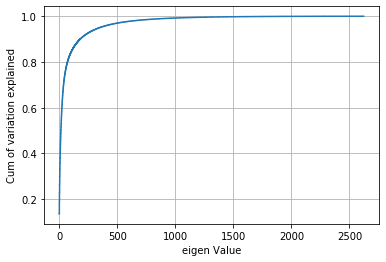

In [103]:
plt.step(list(range(1,2623)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid()
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

We can observe almost 98% variance is contributed by 500 features out of total 2,622 features. Let's freeze on components to 500 for further model building using SVM

In [104]:
pca_500 = PCA(n_components = 500)
pca_revised_training = pca_500.fit_transform(X_train)

In [105]:
pca_revised_test = pca_500.transform(X_test)

In [106]:
pca_revised_test.shape

(1197, 500)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [107]:
from sklearn.svm import SVC

In [108]:
classifier = SVC()
classifier.fit(pca_revised_training, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
classifier.score(pca_revised_training, y_train)

0.8428914655802778

The base/default SVM classifier is giving an accuracy of 84.29% while checking the prediction against training set. It looks like we are loosing important information while taking only 500 features out 2622 features. Let's check the same against the test set.

In [113]:
classifier.predict(pca_revised_test)

array([40, 40, 40, ..., 16, 16, 16])

In [111]:
print(pca_revised_test.shape)
print(test_prediction.shape)
print(y_test.shape)
print(test_prediction)
print(y_test)

(1197, 500)
(1197,)
(1197,)
[40 40 40 ... 16 16 16]
[40 40 40 ... 16 16 16]


In [114]:
classifier.score(pca_revised_test, y_test)

0.7293233082706767

Predictions against test set produce a score of 72.93%. It's not a decent/acceptable score. We can check further by further by increasing PCA components &  by tuning the parameters of SVM. Let's check the same by increasing the components to 874 whihc is 1/3 of total features.

In [116]:
pca_874 = PCA(n_components=874)
pca_874_train = pca_874.fit_transform(X_train_original)
pca_874_test = pca_874.transform(X_test_original)
print('Train Set:',pca_874_train.shape)
print('Test Set:',pca_874_test.shape)
classifier.fit(pca_874_train, y_train)
print('Score on training set:', classifier.score(pca_874_train, y_train))
print('Score on test set:', classifier.score(pca_874_test, y_test))

Train Set: (9573, 874)
Test Set: (1197, 874)
Score on training set: 0.8436226888122845
Score on test set: 0.7251461988304093


Looks like SVM is still not able to generalize very well after increasing components to 874 from 500. Accuracy is almsot at the same level.

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [117]:
test_predictions = classifier.predict(pca_874_test)
test_predictions[10]

20

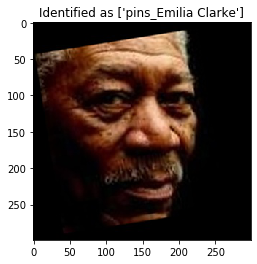

In [124]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[10]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

Looks like facial features of Emilia Clarke & Morgan Freeman are similar. Same can be observed while calculating distance above comaprisons (distance of 0.33 & 0.40). Let's check some other examples.

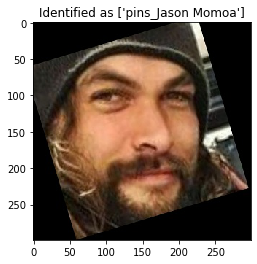

In [126]:
example_idx = 50

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[50]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

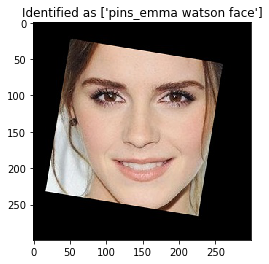

In [127]:
example_idx = 999

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[999]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

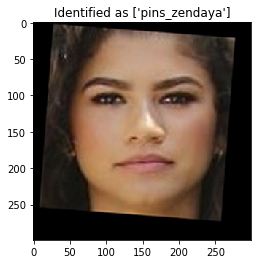

In [128]:
example_idx = 789

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = test_predictions[789]
example_identity = le.inverse_transform([example_prediction])

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

### Observation:
Prediction in all of the above cases is correct. However, in order to generalize the model better, hypertuning SVM parameters can also be considered.